Imports und Weissemodell

In [2]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

Could not load modelbase.assimulate. Sundials support disabled.


In [3]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

In [4]:
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
s.timeCourse(np.linspace(0,3000,100),weise_values);
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


#### plotten von lambda

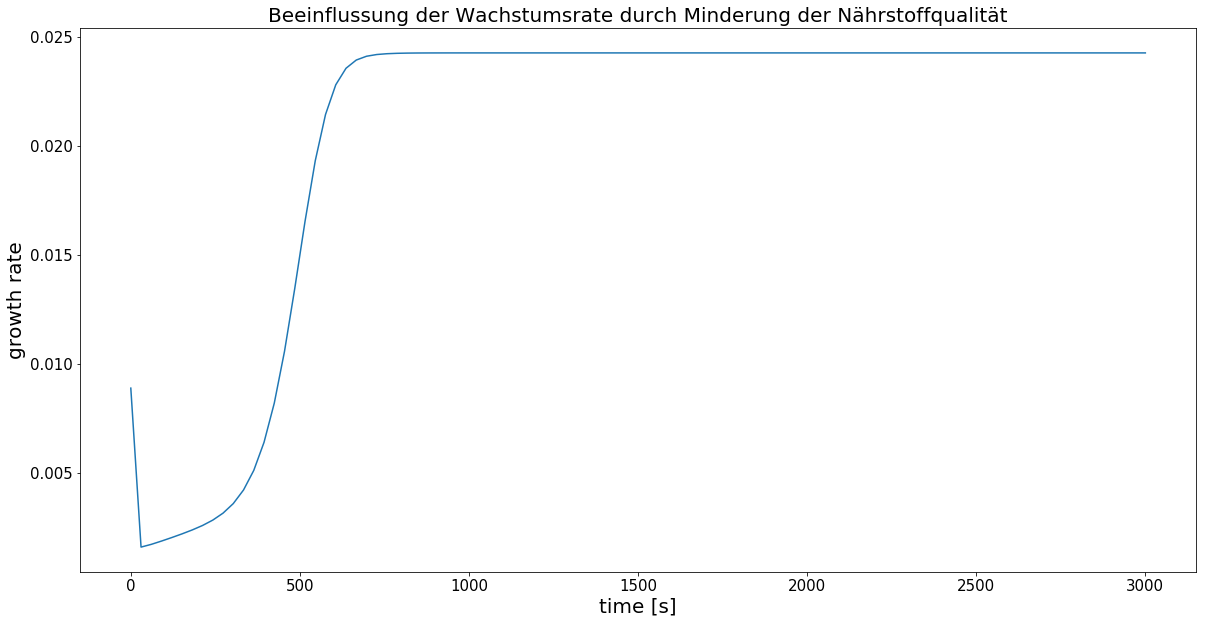

In [8]:
# Plotten Sie die zeitliche Entwicklung
plt.figure(figsize=(20,10))
plt.title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('growth rate', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

#for i, data in enumerate(s.getT()):
plt.plot(s.getT(),s.getY()[:,16], label = 'pr') #valuesOneHundredTimeSteps[i][:,10]
#plt.legend(loc = 'lower right',prop = {'size': 20})

Optimierungfunktion zur Maximierung von Lambda

In [12]:
def Opt(p0):
    
    m = WeisseBaseModel()
    s = modelbase.Simulator(m)
    m.par.wr, m.par.wt, m.par.wm, m.par.wq = p0
    
    #                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
    s.timeCourse(np.linspace(0,3000,100),weise_values);
    lambdanach = s.getY()[:,16][-1]
    lamda = 100 - lambdanach
    print(lamda)
    
    return (lamda)
 


In [13]:
init_guess = [930,4.14,4.14,948.93]


bounds = ((0.1,1000),(0.1,100),(0.1,100),(0.1,1000))


In [14]:
fit = spo.minimize(Opt, init_guess, bounds = bounds)

99.97573718721809
99.97573718721814
99.97573718718165
99.97573718722182
99.97573718721821
99.97572377407006
99.97572377407012
99.97572377403365
99.9757237740738
99.97572377407019
99.96269746607685
99.9626974660769
99.96269746605672
99.96269746608039
99.962697466077
99.96480846181255
99.9648084618126
99.96480846181582
99.96480846160077
99.9648084618127
99.95698840578326
99.95698840578332
99.95698840576799
99.95698840578653
99.95698840578342
99.99426287979868
99.99426287979868
99.99426287979952
99.99426287929896
99.9942628797987
99.95486705634377
99.95486705634382
99.95486705633003
99.95486705634687
99.95486705634393
99.96641775329967
99.96641775329971
99.96641775330276
99.96641775308112
99.9664177532998
99.95424756609755
99.9542475660976
99.95424756608426
99.95424756610048
99.95424756609772
99.99464273457846
99.99464273457848
99.99464273457919
99.99464273410793
99.99464273457849
99.95563076416661
99.95563076416667
99.9556307641697
99.95563076401899
99.95563076416678
99.95386781631088
99

In [15]:
fit

      fun: 99.88881108043385
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -3.78008735e-04,  1.42108547e-06,  1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 245
      nit: 17
   status: 0
  success: True
        x: array([1.00000000e+03, 1.00000000e+02, 3.20826341e+01, 1.00000000e-01])

überschreiben der Parameter in Fit-werte

In [5]:
mneu = WeisseBaseModel()

#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values_neu = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])


mneu.par.update({'wr':1.00000000e+03})
mneu.par.update({'wt':1.00000000e+02})
mneu.par.update({'wm':3.20826341e+01})
mneu.par.update({'wq':1.00000000e-01})

sneu = modelbase.Simulator(mneu)
sneu.timeCourse(np.linspace(0,3000,100),weise_values_neu);


Plotten des Wachtums vor und nach dem Fit

Text(0, 0.5, 'concentration [a.u.]')

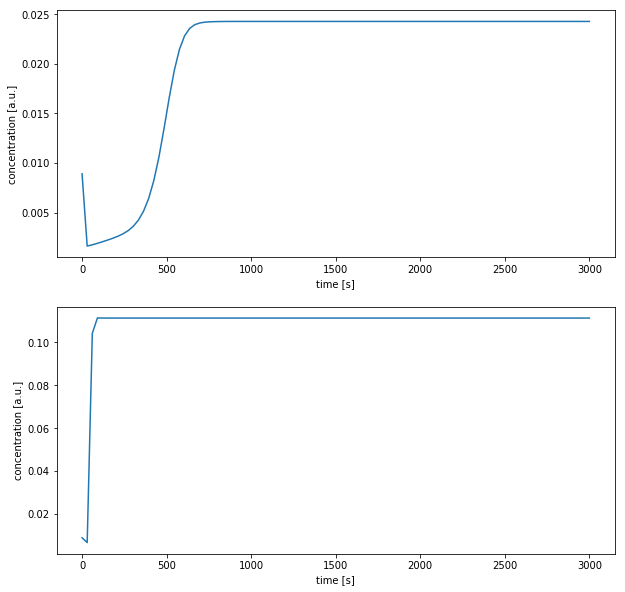

In [10]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getY()[:,16])
#Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[1:2]),label = cl[1])
#Plotlist[0].set_title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')


#Plotlist[0].plot(s.getT(),s.getRate('vr'))
Plotlist[1].plot(sneu.getT(),sneu.getY()[:,16])
#Plotlist[1].set_title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')

model ohne fit 

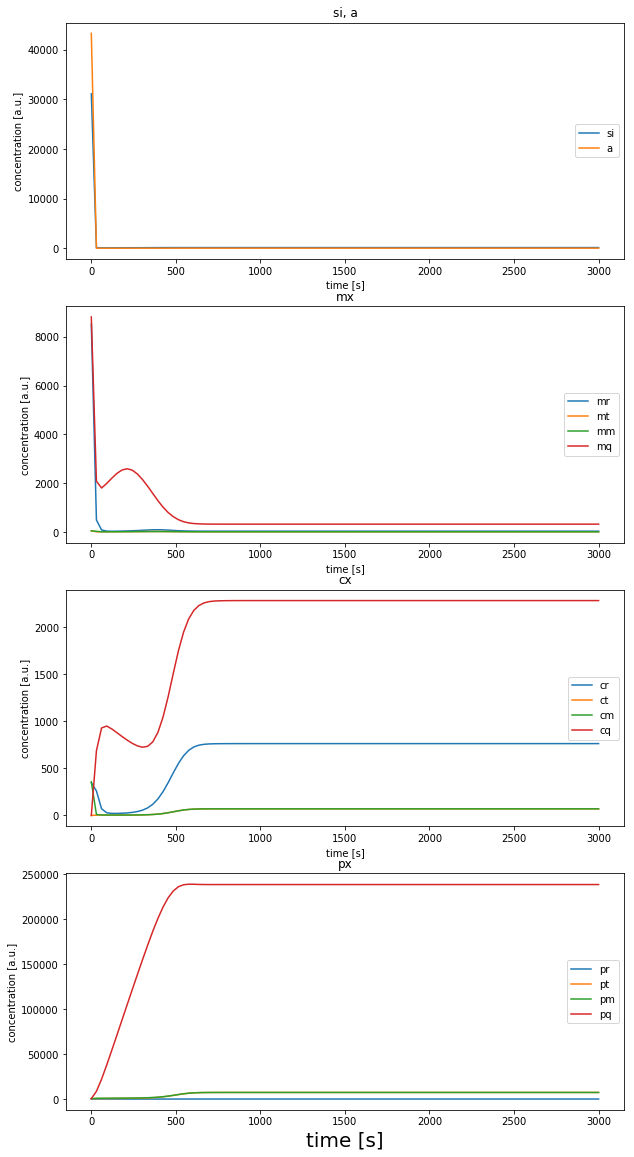

In [11]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(s.getT(),s.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(s.getT(),s.getVarsByName(cl[2:3]),label = cl[2])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[4:5]),label = cl[4])
Plotlist[1].plot(s.getT(),s.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(s.getT(),s.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(s.getT(),s.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(s.getT(),s.getVarsByName(cl[10:11]), label = cl[10])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[11:12]),label = cl[11])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[12:13]),label = cl[12])
Plotlist[3].plot(s.getT(),s.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')



Model mit Fit

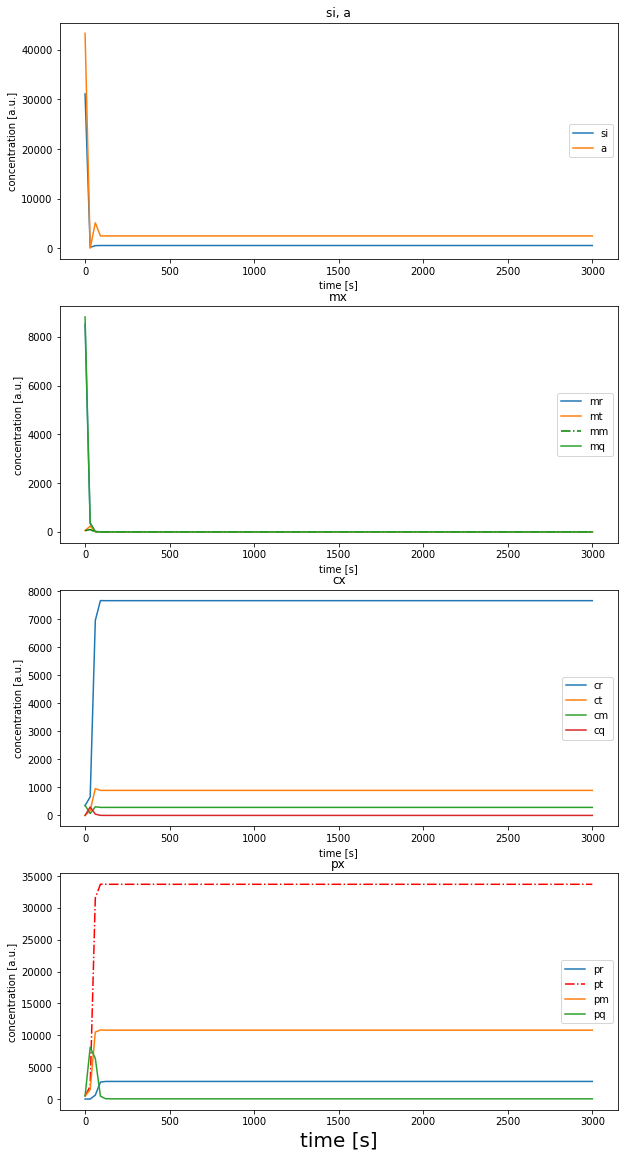

In [12]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,20))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[0:1]),label = cl[0])
Plotlist[0].plot(sneu.getT(),sneu.getVarsByName(cl[1:2]),label = cl[1])
Plotlist[0].set_title('si, a')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].legend(loc = 'center right')


Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[2:3]),label = cl[2])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[3:4]),label = cl[3])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[4:5]),'g-.',label = cl[4])
Plotlist[1].plot(sneu.getT(),sneu.getVarsByName(cl[5:6]),label = cl[5])
Plotlist[1].set_title('mx')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
#Plotlist[1].set_xlim(25,50)
#Plotlist[1].set_ylim(0,0.5)
Plotlist[1].legend(loc = 'center right')


Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[6:7]),label = cl[6])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[7:8]),label = cl[7])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[8:9]),label = cl[8])
Plotlist[2].plot(sneu.getT(),sneu.getVarsByName(cl[9:10]),label = cl[9])
Plotlist[2].set_title('cx')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].legend(loc = 'center right')


Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[10:11]), label = cl[10])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[11:12]),'r-.',label = cl[11])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[12:13]),label = cl[12])
Plotlist[3].plot(sneu.getT(),sneu.getVarsByName(cl[13:14]),label = cl[13])
Plotlist[3].set_title('px')
Plotlist[3].set_xlabel('time [s]', size = 20)
Plotlist[3].set_ylabel('concentration [a.u.]')
Plotlist[3].legend(loc = 'center right')

Vergleich von vr

(0, 1000)

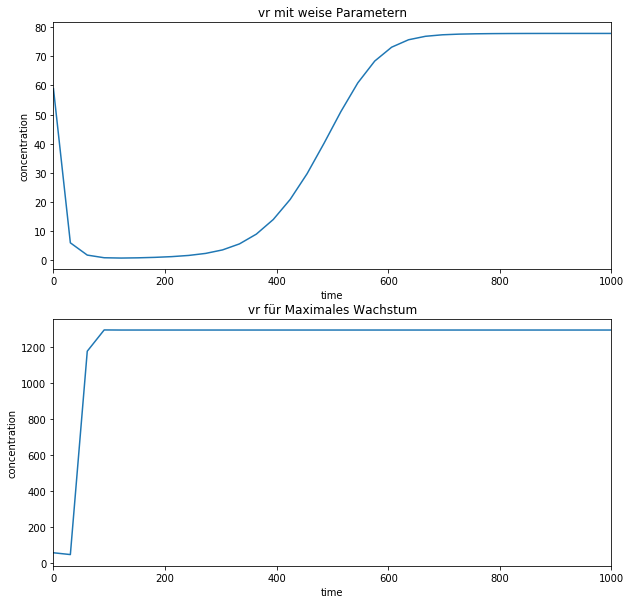

In [13]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vr'))
Plotlist[0].set_title('vr mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vr'))
Plotlist[1].set_title('vr für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

Vergleich von vt

(0, 1000)

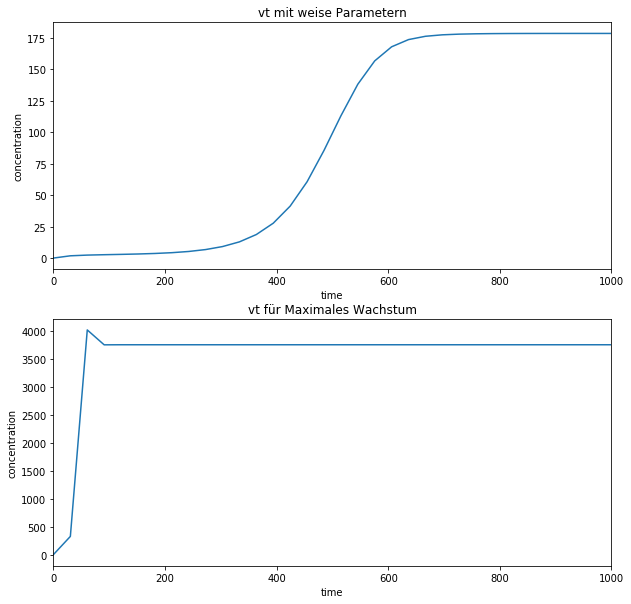

In [14]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vt'))
Plotlist[0].set_title('vt mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vt'))
Plotlist[1].set_title('vt für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

Vergleich von vm

(0, 1000)

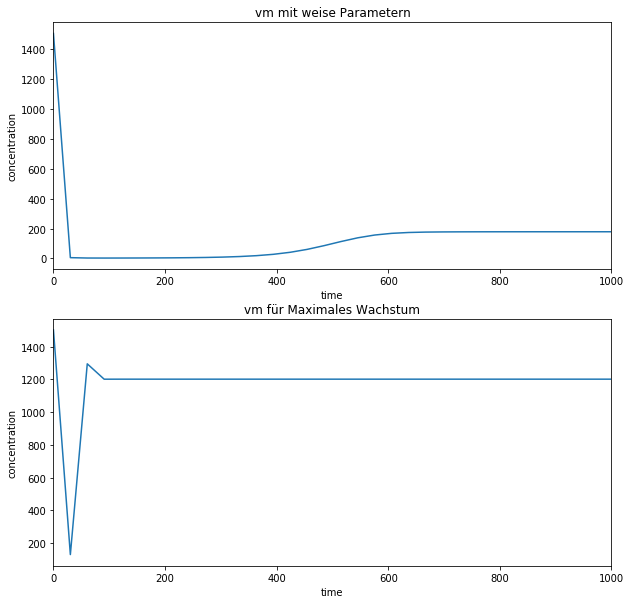

In [15]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vm'))
Plotlist[0].set_title('vm mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vm'))
Plotlist[1].set_title('vm für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)

Vergleich von vq

(0, 1000)

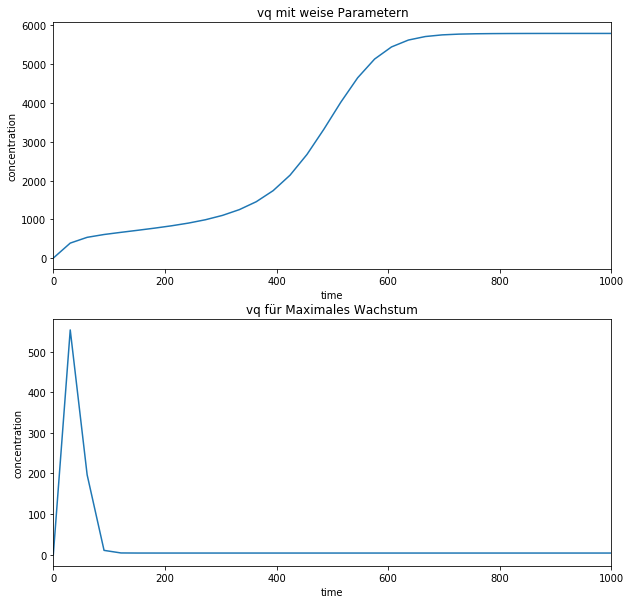

In [16]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vq'))
Plotlist[0].set_title('vq mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vq'))
Plotlist[1].set_title('vq für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


Vergleich von vimp

(0, 1000)

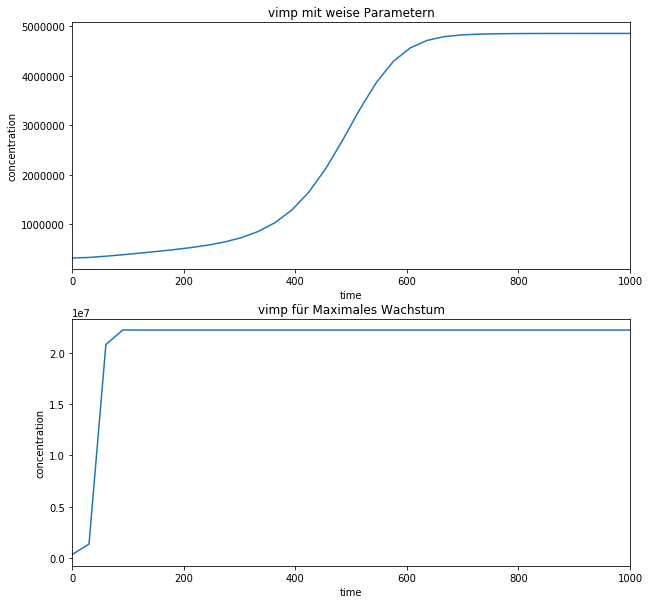

In [17]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vimp'))
Plotlist[0].set_title('vimp mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vimp'))
Plotlist[1].set_title('vimp für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


Vergleich von vcat

(0, 1000)

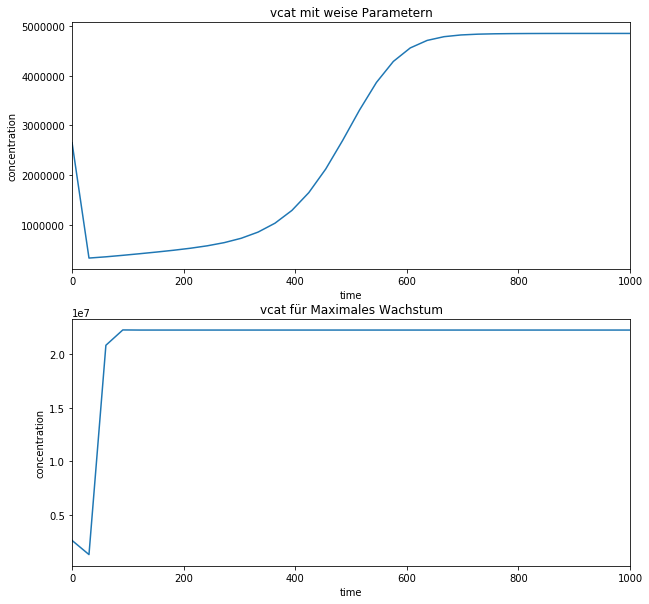

In [18]:
fig, Plotlist = plt.subplots(2,1,figsize=(10,10))
Plotlist = Plotlist.ravel()
Plotlist[0].plot(s.getT(),s.getRate('vcat'))
Plotlist[0].set_title('vcat mit weise Parametern')
Plotlist[0].set_xlabel('time')
Plotlist[0].set_ylabel('concentration')
#Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,1000)


Plotlist[1].plot(sneu.getT(),sneu.getRate('vcat'))
Plotlist[1].set_title('vcat für Maximales Wachstum') 
Plotlist[1].set_xlabel('time')
Plotlist[1].set_ylabel('concentration')
#Plotlist[1].set_ylim(60,140)
Plotlist[1].set_xlim(0,1000)


In [19]:
mneu.stoichiometries

{'vimp': {'si': 1},
 'vcat': {'si': -1, 'a': 0.5},
 'vr': {'a': -7459, 'pr': 2, 'mr': 1, 'cr': -1},
 'vt': {'a': -300, 'pr': 1, 'pt': 1, 'mt': 1, 'ct': -1},
 'vm': {'a': -300, 'pr': 1, 'pm': 1, 'mm': 1, 'cm': -1},
 'vq': {'a': -300, 'pr': 1, 'pq': 1, 'mq': 1, 'cq': -1},
 'cbur': {'pr': -1, 'mr': -1, 'cr': 1},
 'cbut': {'pr': -1, 'mt': -1, 'ct': 1},
 'cbum': {'pr': -1, 'mm': -1, 'cm': 1},
 'cbuq': {'pr': -1, 'mq': -1, 'cq': 1},
 'omegar': {'mr': 1},
 'degmr': {'mr': -1},
 'omegat': {'mt': 1},
 'degmt': {'mt': -1},
 'omegam': {'mm': 1},
 'degmm': {'mm': -1},
 'omegaq': {'mq': 1},
 'degmq': {'mq': -1},
 'dilution_si': {'si': -1},
 'dilution_a': {'a': -1},
 'dilution_mr': {'mr': -1},
 'dilution_mt': {'mt': -1},
 'dilution_mm': {'mm': -1},
 'dilution_mq': {'mq': -1},
 'dilution_cr': {'cr': -1},
 'dilution_ct': {'ct': -1},
 'dilution_cm': {'cm': -1},
 'dilution_cq': {'cq': -1},
 'dilution_pr': {'pr': -1},
 'dilution_pt': {'pt': -1},
 'dilution_pm': {'pm': -1},
 'dilution_pq': {'pq': -1}}

# Veränderung des Verhältnisses von vr,vt,vm und vq  über die Zeit

array zu listen

In [35]:
s.getY()[:,16]

array([0.00890138, 0.00161698, 0.00174236, 0.00189363, 0.00205456,
       0.00222301, 0.00240353, 0.00260718, 0.00285336, 0.0031727 ,
       0.00361101, 0.00423417, 0.00513206, 0.00641787, 0.00821258,
       0.01059005, 0.01347138, 0.01654009, 0.019322  , 0.02143932,
       0.0228015 , 0.02355913, 0.02393552, 0.02410974, 0.02418896,
       0.02422619, 0.0242446 , 0.02425394, 0.02425861, 0.02426086,
       0.0242619 , 0.02426238, 0.0242626 , 0.02426271, 0.02426276,
       0.02426279, 0.0242628 , 0.02426281, 0.02426281, 0.02426281,
       0.02426281, 0.02426281, 0.02426281, 0.02426281, 0.02426281,
       0.02426281, 0.02426281, 0.02426281, 0.02426281, 0.02426281,
       0.02426281, 0.02426281, 0.02426281, 0.02426281, 0.02426281,
       0.02426281, 0.02426281, 0.02426281, 0.02426281, 0.02426281,
       0.02426281, 0.02426281, 0.02426281, 0.02426281, 0.02426281,
       0.02426281, 0.02426281, 0.02426281, 0.02426281, 0.02426281,
       0.02426281, 0.02426281, 0.02426281, 0.02426281, 0.02426

In [24]:
vr = sneu.getRate('vr').tolist()
vt = sneu.getRate('vt').tolist()
vm = sneu.getRate('vm').tolist()
vq = sneu.getRate('vq').tolist()
lambdawert = s.getY()[:,16]

[0.00890138 0.00161698 0.00174236 0.00189363 0.00205456 0.00222301
 0.00240353 0.00260718 0.00285336 0.0031727  0.00361101 0.00423417
 0.00513206 0.00641787 0.00821258 0.01059005 0.01347138 0.01654009
 0.019322   0.02143932 0.0228015  0.02355913]


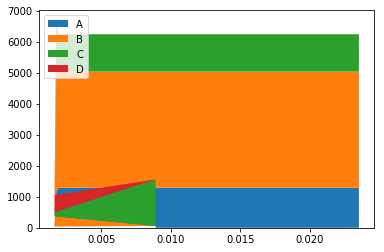

In [36]:
# Your x and y axis
x= lambdawert[0:22]#range(0,100)
print(x)
y=[ vr[0:22], vt[0:22], vm[0:22], vq[0:22] ]

# Basic stacked area chart.
plt.stackplot(x,y, labels=['A','B','C','D'])
plt.legend(loc='upper left')
plt.show()

# --- FORMAT 2</pre>
#x = lambdawert#range(0,100)
#y1 = vr
#y2 = vt
#y3 = vm
#y4 = vq

# Basic stacked area chart.
#plt.stackplot(x,y1, y2, y3, y4 ,labels=['A','B','C','D'])
#plt.legend(loc='upper left')

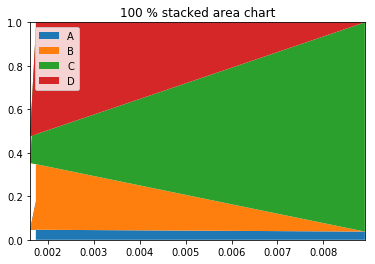

In [29]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Make data
data = pd.DataFrame({'group_A':vr[0:3], 'group_B':vt[0:3], 'group_C':vm[0:3], 'group_D':vq[0:3]}, index=lambdawert[0:3])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawert[0:3],  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['A','B','C', 'D'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()


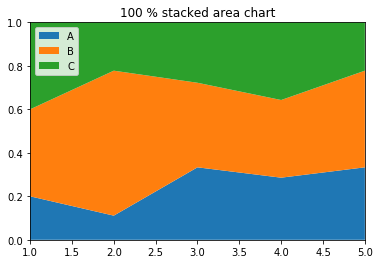

In [81]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Make data
data = pd.DataFrame({  'group_A':[1,4,6,8,9], 'group_B':[2,24,7,10,12], 'group_C':[2,8,5,10,6] }, index=range(1,6))
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()


In [82]:
data_perc

,group_A,group_B,group_C
1,0.200000,0.400000,0.400000
2,0.111111,0.666667,0.222222
3,0.333333,0.388889,0.277778
4,0.285714,0.357143,0.357143
5,0.333333,0.444444,0.222222


In [46]:
pip install seaborn

    100% |████████████████████████████████| 215kB 4.5MB/s 
Note: you may need to restart the kernel to use updated packages.
